# IRIS CLASSIFICATION

### Import the Necessary Header File

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.shape

(150, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Checking for Null Values

In [8]:
print(data.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


### Checking for Dupilicates Value

In [9]:
print(data.duplicated().sum())

0


In [13]:
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()
data['Species']=le.fit_transform(data['Species'])
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [18]:
data.drop(columns='Id',axis=1,inplace=True) 

### Data Visualization 

<Axes: xlabel='Species', ylabel='count'>

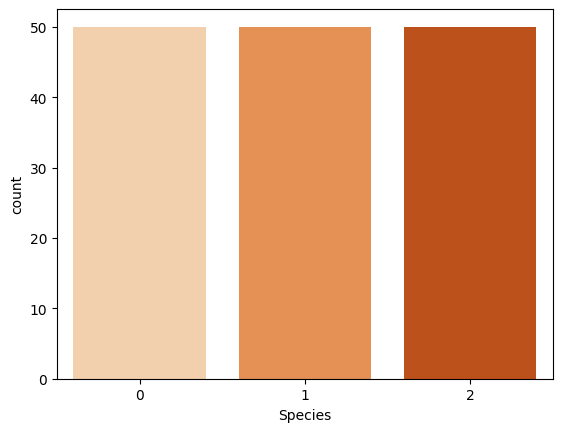

In [19]:
sns.countplot(data=data,x='Species',palette='Oranges')

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

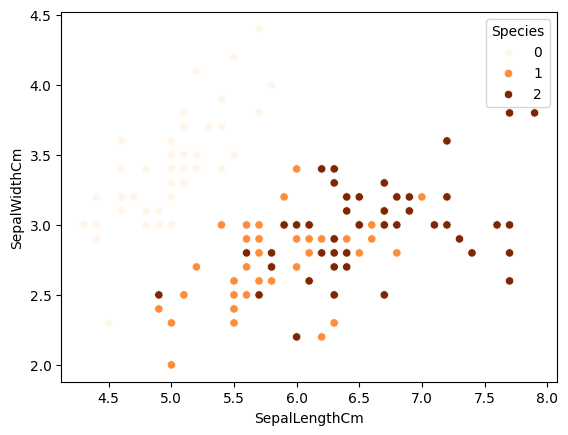

In [20]:
sns.scatterplot(data=data,x='SepalLengthCm',y='SepalWidthCm',hue='Species',palette='Oranges')

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

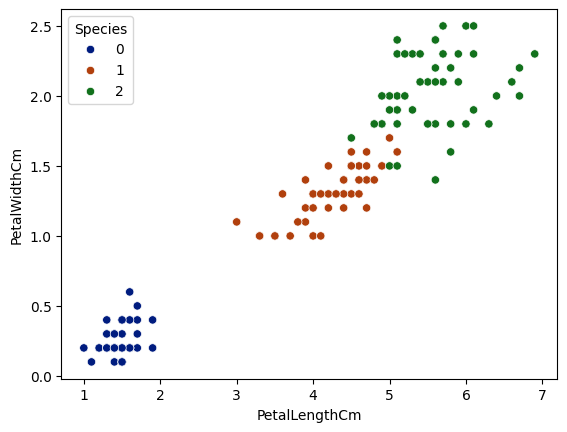

In [24]:
sns.scatterplot(data=data,x='PetalLengthCm',y='PetalWidthCm',hue='Species',palette='dark')

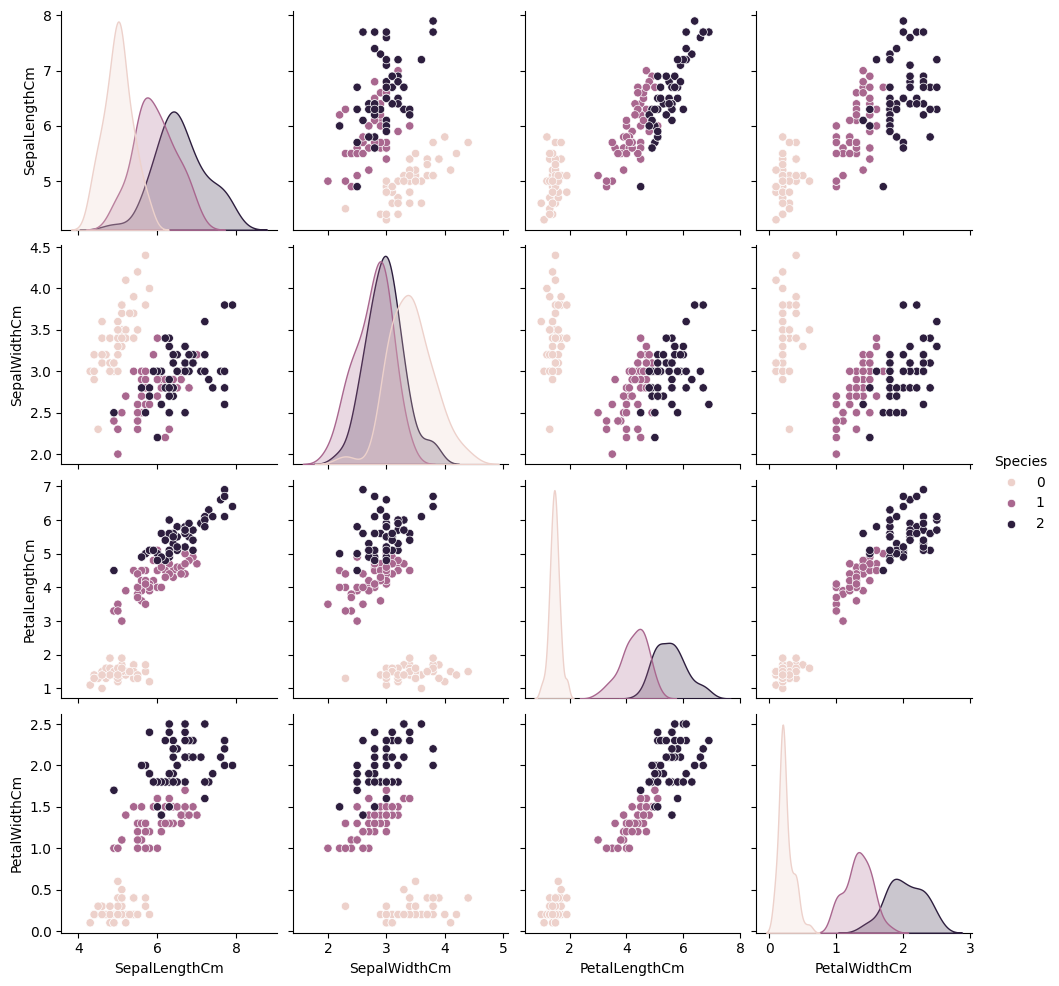

In [25]:
sns.pairplot(data=data,hue='Species')

In [22]:
iris_correlation=data.corr()
print(iris_correlation)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954   
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544   
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757   
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000   
Species             0.782561     -0.419446       0.949043      0.956464   

                Species  
SepalLengthCm  0.782561  
SepalWidthCm  -0.419446  
PetalLengthCm  0.949043  
PetalWidthCm   0.956464  
Species        1.000000  


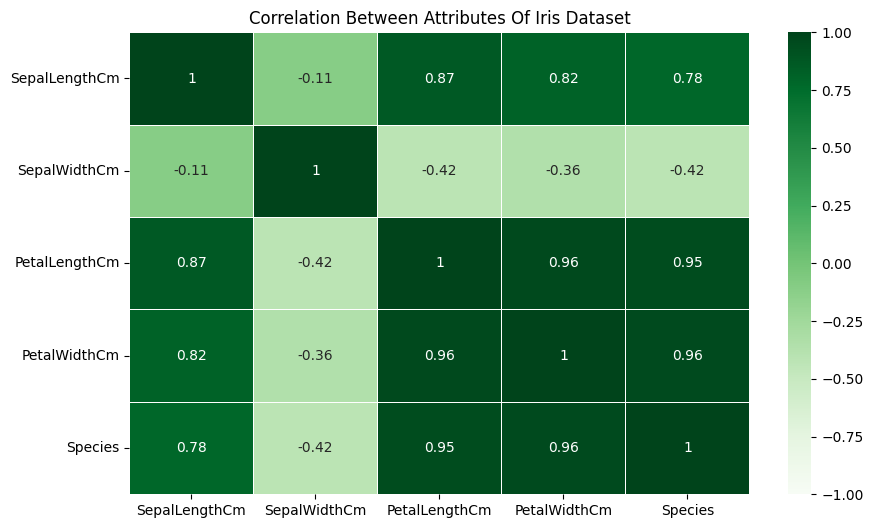

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(data=iris_correlation,vmin=-1,vmax=1,cmap='Greens',annot=True,linewidths=0.4)
plt.title("Correlation Between Attributes Of Iris Dataset")
plt.show()

### Model Training

In [26]:
X = data.drop(columns=['Species'])
Y = data['Species']
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=62)


In [29]:
from sklearn.linear_model import LogisticRegression #Logistic Regression is imported
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)
logistic_regression_pred = logistic_regression_model.predict(X_test)
regression_accuracy = (accuracy_score(y_test, logistic_regression_pred))*100
print(f'Regression Accuracy: {regression_accuracy:}')



Regression Accuracy: 96.0


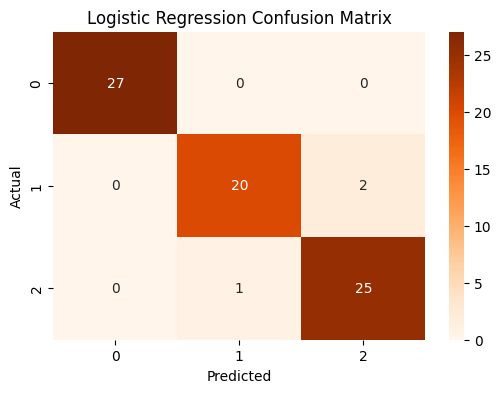

In [30]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, logistic_regression_pred), annot=True, fmt='d', cmap='Oranges')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [31]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = (accuracy_score(y_test, knn_pred))*100
print(f'K-Nearest Neighbors Accuracy: {knn_accuracy:}')

K-Nearest Neighbors Accuracy: 94.66666666666667


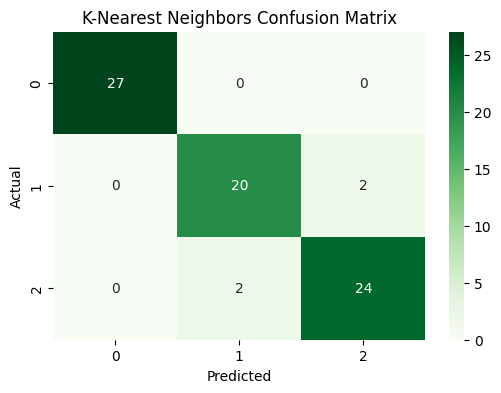

In [32]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt='d', cmap='Greens')
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()